<a href="https://colab.research.google.com/github/fertika-ds/KlasifikasiKankerPayudara/blob/main/TUBES_FSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Fertika Indri Dhamaningrum 24523160
*   Annisa Ramdhani 24523018



# **1. Latar Belakang**

**Studi Kasus : Klasifikasi Diagnosis Kanker Payudara**

**A. Mengapa Model ini Perlu Dibuat?**

Diagnosis kanker payudara secara konvensional seringkali melibatkan analisis mikroskopis yang memakan waktu dan bergantung pada keahlian serta penilaian subjektif patolog. Model ini dibuat untuk mengatasi tantangan tersebut:

Objektivitas: Mengurangi subjektivitas diagnosis dengan mengandalkan 30 pengukuran numerik dari sel.

Kecepatan: Memberikan prediksi awal yang cepat, yang krusial dalam kasus diagnosis kanker.

Dukungan Keputusan Klinis: Berfungsi sebagai alat pendukung keputusan klinis (Clinical Decision Support) untuk memprioritaskan pasien berisiko tinggi.

**B. Siapa yang akan Menggunakan Model tersebut?**

Model ini ditujukan untuk digunakan oleh laboratorium patologi, ahli onkologi, atau unit skrining awal di rumah sakit.

**C. Untuk Tujuan Apa Model tersebut Digunakan?**

Tujuan utamanya adalah melakukan klasifikasi biner untuk memprediksi apakah massa sel (tumor) bersifat Ganas (Malignant) atau Jinak (Benign) berdasarkan data biometrik.




# **2. Metode**


  **A. Dataset**

Sumber: Breast Cancer Wisconsin (Diagnostic) Dataset (sklearn.datasets.load_breast_cancer).

Jumlah Sampel: 569 sampel.

Fitur (X): 30 fitur kontinu (numerik) yang mencakup karakteristik nukleus sel (misalnya, mean radius, mean texture, worst perimeter, dll.).

Target (y): Variabel biner, di mana 0 = Ganas (kelas minoritas) dan 1 = Jinak (kelas mayoritas).

  **B. Algoritma: Gaussian Naive Bayes (GNB)**

Mengapa GNB? GNB dipilih karena fitur-fiturnya (pengukuran fisik) bersifat kontinu. GNB mengasumsikan bahwa distribusi probabilitas setiap fitur dalam setiap kelas (Ganas atau Jinak) mengikuti Distribusi Normal (Gaussian).

Prinsip Kerja: Selama pelatihan, GNB menghitung rata-rata ($\mu$) dan varians ($\sigma^2$) setiap dari 30 fitur untuk masing-masing kelas (Ganas dan Jinak). Saat memprediksi sampel baru, model menggunakan statistik ini untuk menghitung probabilitas sampel tersebut termasuk dalam kelas Ganas atau Jinak


**C. Langkah Pemrosesan Data**

Scaling (StandardScaler): Menerapkan normalisasi pada fitur-fitur, mengubah rata-rata setiap fitur menjadi 0 dan standar deviasi menjadi 1. Langkah ini penting untuk menstandarkan rentang fitur sehingga tidak ada fitur yang mendominasi model karena skalanya yang lebih besar.

Pembagian Data (train_test_split): Data dibagi menjadi 70% untuk Training dan 30% untuk Testing. Pembagian dilakukan dengan stratification (stratify=y) untuk memastikan rasio kelas Ganas/Jinak di set training dan testing tetap sama.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Memuat Dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
print('--- Tampilan 5 Sampel Data Teratas ---')
display(X_combined.head())
print('------------------------------------------')

print('\n--- Tampilan 5 Sampel Data Terbawah ---')
display(X_combined.tail())
print('------------------------------------------')
# --- LANJUTKAN PROSES MACHINE LEARNING ---

--- Tampilan 5 Sampel Data Teratas ---


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


------------------------------------------

--- Tampilan 5 Sampel Data Terbawah ---


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


------------------------------------------


### **Visualisasi Sampel Data Individual**

Tabel di atas menampilkan 5 baris pertama (head) dan 5 baris terakhir (tail) dari dataset Anda (`X_combined`). Setiap baris dalam tabel ini adalah **satu sampel data**.

*   **Setiap Kolom**: Mewakili satu dari 30 fitur pengukuran (misalnya, `mean radius`, `mean texture`, dll.) ditambah kolom `Diagnosis`.
*   **Setiap Baris**: Mewakili satu kasus observasi atau satu set pengukuran dari nukleus sel. Misalnya, baris pertama adalah semua karakteristik dari sel pertama yang diamati, dengan `Diagnosis` '0' (Ganas).

Ini adalah cara untuk melihat 'isi' dari sampel data secara langsung, menunjukkan bagaimana setiap entri dalam dataset Anda terstruktur.

In [ ]:
# Generate descriptive statistics of the dataset
data_description = X_combined.describe()
print(data_description)

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

Setiap baris dalam tabel tersebut adalah ringkasan statistik untuk setiap fitur (kolom), dan artinya adalah sebagai berikut:

count: Menunjukkan jumlah total entri atau sampel non-null untuk fitur tersebut. Dalam kasus 569.000000 untuk semua fitur berarti ada 569 pengamatan lengkap untuk setiap fitur.

mean (Rata-rata): Ini adalah nilai rata-rata aritmetika dari semua nilai dalam fitur tersebut. Contoh:

mean radius: Rata-rata ukuran radius sel adalah sekitar 14.13.
mean texture: Rata-rata tekstur sel adalah sekitar 19.29.
Dan seterusnya untuk fitur lainnya.
std (Standard Deviation / Standar Deviasi): Ini mengukur sebaran atau penyebaran data dari nilai rata-ratanya. Standar deviasi yang tinggi menunjukkan bahwa nilai-nilai data tersebar jauh dari rata-rata, sedangkan standar deviasi yang rendah menunjukkan bahwa nilai-nilai cenderung dekat dengan rata-rata. Contoh:

mean radius memiliki std sekitar 3.52, yang menunjukkan variasi ukuran radius yang cukup besar.
mean fractal dimension memiliki std yang jauh lebih kecil, sekitar 0.007, menunjukkan nilai-nilai fitur ini lebih terkonsentrasi di sekitar rata-ratanya.
min (Minimum): Nilai terkecil yang ditemukan dalam fitur tersebut. Contoh:

mean radius: Nilai radius terkecil adalah 6.981.
mean concavity: Terdapat sel dengan nilai concavity 0.000, yang mungkin menunjukkan tidak ada rongga sama sekali.
25% (Kuartil Pertama / Q1): Ini adalah nilai di mana 25% data berada di bawah nilai tersebut (atau median dari setengah bagian bawah data).

50% (Median / Kuartil Kedua / Q2): Ini adalah nilai tengah dari fitur tersebut ketika data diurutkan. Jika jumlah data ganjil, itu adalah nilai tengah; jika genap, itu adalah rata-rata dari dua nilai tengah. Median seringkali lebih resisten terhadap outlier dibandingkan mean.

75% (Kuartil Ketiga / Q3): Ini adalah nilai di mana 75% data berada di bawah nilai tersebut (atau median dari setengah bagian atas data).

max (Maksimum): Nilai terbesar yang ditemukan dalam fitur tersebut. Contoh:

mean radius: Nilai radius terbesar adalah 28.11.
worst perimeter: Keliling terburuk yang tercatat adalah 251.2.
Secara khusus untuk fitur yang Anda sebutkan:

mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension: Ini adalah 10 fitur utama yang mengukur karakteristik nukleus sel, seperti ukuran rata-rata, tekstur, keliling, area, kehalusan, kekompakan, konkavitas, titik cekung, simetri, dan dimensi fraktal. Statistik deskriptif ini memberikan gambaran tentang distribusi nilai-nilai ini di seluruh dataset.

... worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension: Fitur-fitur ini adalah 'worst' atau nilai terbesar/terburuk dari karakteristik sel yang sama, dihitung dari tiga nilai terbesar di setiap fitur. Mereka memberikan informasi tentang karakteristik sel yang paling ekstrem dalam sampel. Misalnya, worst radius adalah radius dari tiga titik terpanjang dari pusat.

Diagnosis: Ini adalah kolom target Anda, di mana 0 biasanya mewakili Ganas (Malignant) dan 1 mewakili Jinak (Benign). Statistik deskriptif untuk Diagnosis menunjukkan:

count: 569, jumlah total sampel.
mean: 0.627417, ini adalah proporsi kelas 1 (Jinak) dalam dataset. Jadi, sekitar 62.7% sampel adalah Jinak, dan sisanya (sekitar 37.3%) adalah Ganas.
std, min, 25%, 50%, 75%, max untuk Diagnosis adalah 0 atau 1 karena ini adalah variabel biner, dan tidak memiliki makna interval seperti fitur lainnya.
Statistik ini sangat berguna untuk memahami karakteristik dasar data Anda, mengidentifikasi potensi outlier, dan melihat sebaran nilai sebelum Anda membangun model.

In [ ]:
#Tahap pre-processing
# 2. Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Tahap pre-processing
# 3. Bagi Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# --- TAMPILAN JUMLAH SAMPEL SETELAH PEMBAGIAN ---
print("--- JUMLAH SAMPEL SETELAH SPLIT (70:30) ---")
print(f"Data Training (70%): {len(X_train)} sampel")
print(f"Data Testing (30%): {len(X_test)} sampel")
print("---------------------------------------------")

--- JUMLAH SAMPEL SETELAH SPLIT (70:30) ---
Data Training (70%): 398 sampel
Data Testing (30%): 171 sampel
---------------------------------------------


In [ ]:
# 4. Melatih Model Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# 5. Prediksi
y_pred = gnb_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

# 6.  Laporan Klasifikasi dan hitung Confusion Matrix dan
cm = confusion_matrix(y_test, y_pred)
target_names = ['Ganas (0)', 'Jinak (1)']

print("--- LAPORAN KLASIFIKASI ---")
print(classification_report(y_test, y_pred, target_names=target_names))

--- LAPORAN KLASIFIKASI ---
              precision    recall  f1-score   support

   Ganas (0)       0.93      0.89      0.91        64
   Jinak (1)       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# 7. Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
target_names = ['Ganas (0)', 'Jinak (1)']

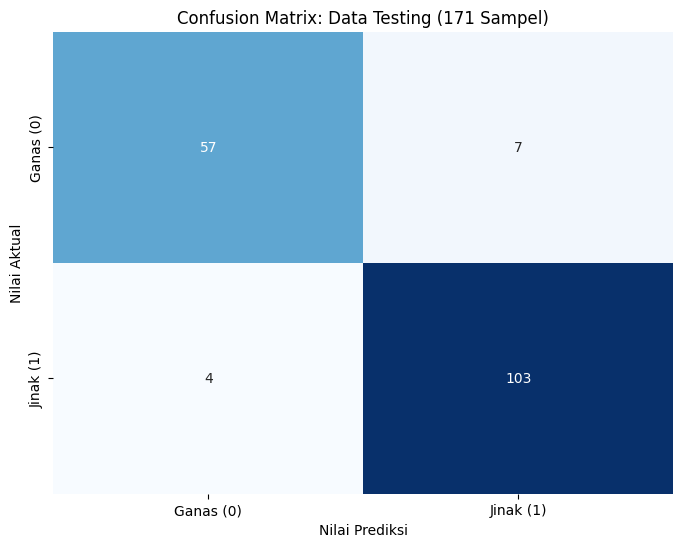

In [ ]:
# 8. Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=False
)
plt.title(f'Confusion Matrix: Data Testing ({len(X_test)} Sampel)')
plt.ylabel('Nilai Aktual')
plt.xlabel('Nilai Prediksi')
plt.show()

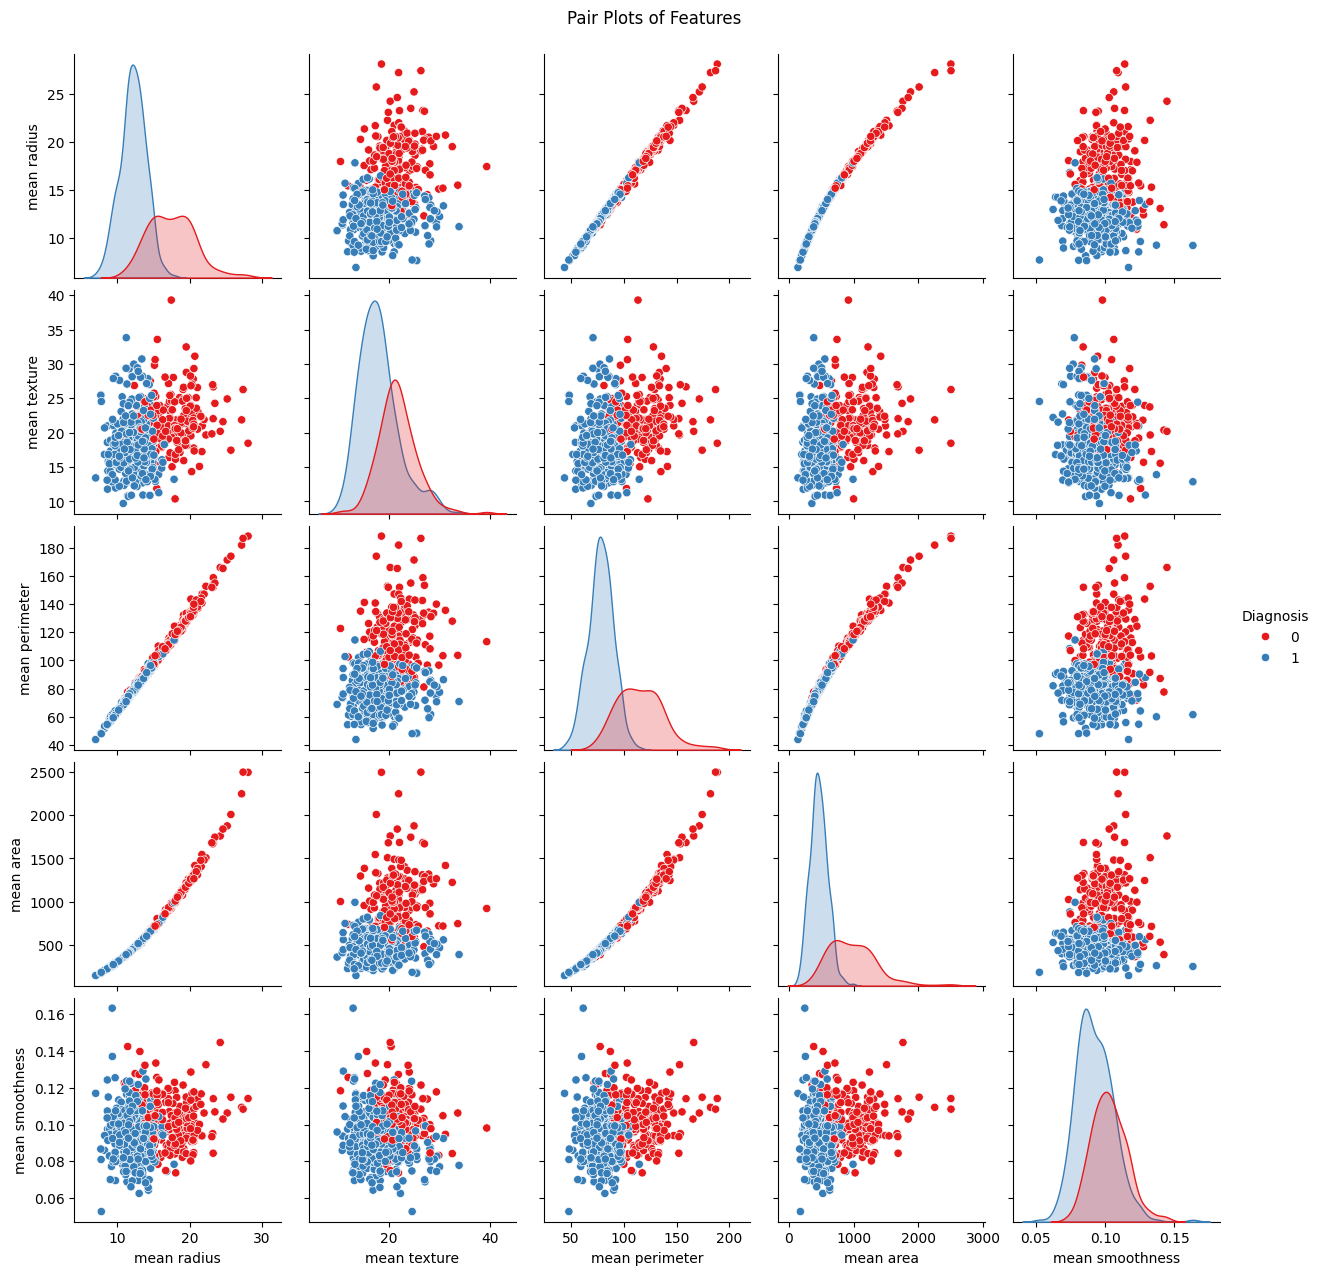

In [ ]:
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'Diagnosis']
sns.pairplot(X_combined[cols], hue='Diagnosis', palette='Set1')
plt.suptitle("Pair Plots of Features", y=1.02)
plt.show()

Visualisasi Pair Polt



Kiri Atas	57	True Positive (TP)	Model dengan benar memprediksi 57 kasus sebagai Ganas (0).

Kanan Bawah	103	True Negative (TN)	Model dengan benar memprediksi 103 kasus sebagai Jinak (1).

Kanan Atas	7	False Negative (FN)	Kesalahan Kritis: Model salah memprediksi 7 kasus yang sebenarnya Ganas (0) sebagai Jinak (1).

Kiri Bawah	4	False Positive (FP)	Kesalahan Alarm Palsu: Model salah memprediksi 4 kasus yang sebenarnya Jinak (1) sebagai Ganas (0).

## **3. Evaluasi Model**

Berdasarkan Laporan Klasifikasi:
Model Gaussian Naive Bayes menunjukkan performa yang sangat baik dalam mengklasifikasikan diagnosis kanker payudara dengan akurasi keseluruhan 94%.

*   **Precision (Presisi)**:
    *   **Ganas (0): 0.93** - Dari semua yang diprediksi sebagai 'Ganas', 93% di antaranya benar-benar 'Ganas'. Ini menunjukkan model sangat baik dalam tidak salah mengklasifikasikan 'Jinak' sebagai 'Ganas'.
    *   **Jinak (1): 0.94** - Dari semua yang diprediksi sebagai 'Jinak', 94% di antaranya benar-benar 'Jinak'.

*   **Recall (Sensitivitas)**:
    *   **Ganas (0): 0.89** - Dari semua kasus 'Ganas' yang sebenarnya, model berhasil mengidentifikasi 89% di antaranya. Ini penting untuk memastikan tidak banyak kasus 'Ganas' yang terlewatkan (false negative).
    *   **Jinak (1): 0.96** - Dari semua kasus 'Jinak' yang sebenarnya, model berhasil mengidentifikasi 96% di antaranya.

*   **F1-Score**:
    *   **Ganas (0): 0.91** - Merupakan rata-rata harmonik dari presisi dan recall. Nilai 0.91 untuk kelas 'Ganas' menunjukkan keseimbangan yang baik antara presisi dan recall, yang krusial untuk diagnosis kanker.
    *   **Jinak (1): 0.95** - Menunjukkan performa yang sangat baik untuk kelas 'Jinak'.

*   **Support**:
    *   **Ganas (0): 64** - Jumlah sampel aktual yang berlabel 'Ganas' dalam data pengujian.
    *   **Jinak (1): 107** - Jumlah sampel aktual yang berlabel 'Jinak' dalam data pengujian.

*   **Accuracy (Akurasi): 0.94** - Secara keseluruhan, model memprediksi dengan benar 94% dari total sampel di data pengujian. Ini adalah metrik umum, namun untuk kasus kanker, presisi dan recall per kelas lebih informatif.

### **Kesimpulan Evaluasi:**

Model Gaussian Naive Bayes ini menunjukkan performa yang sangat baik dalam mengklasifikasikan diagnosis kanker payudara. Dengan akurasi keseluruhan 94%, model ini memiliki kemampuan tinggi untuk membedakan antara sel Ganas dan Jinak. Terutama, recall yang tinggi untuk kelas 'Jinak' (96%) dan recall yang cukup baik untuk kelas 'Ganas' (89%) mengindikasikan bahwa model ini cukup andal dalam mendeteksi kanker sekaligus meminimalkan kesalahan identifikasi sel sehat. Precision yang tinggi untuk kedua kelas juga menunjukkan bahwa model jarang membuat prediksi yang salah.

Performanya yang kuat ini menjadikannya alat pendukung keputusan yang potensial dalam membantu ahli medis.